In [2]:
pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=54765397476e4833f9e7c612c6871b96d629e5a36ec4a7371b3e82c0e7e17eff
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

data_redundancy = ctrl.Antecedent(np.arange(0, 11, 1), 'data redundancy')
degradation_level = ctrl.Antecedent(np.arange(0, 11, 1), 'degradation level')
error_history = ctrl.Antecedent(np.arange(0, 11, 1), 'error history')

# Consequent variable for error mitigation
error_mitigation_action = ctrl.Consequent(np.arange(0, 101, 1), 'error mitigation action')

# Fuzzification
data_redundancy['low'] = fuzz.trimf(data_redundancy.universe, [0, 0, 5])
data_redundancy['medium'] = fuzz.trimf(data_redundancy.universe, [0, 5, 10])
data_redundancy['high'] = fuzz.trimf(data_redundancy.universe, [5, 10, 10])

degradation_level['low'] = fuzz.trimf(degradation_level.universe, [0, 0, 5])
degradation_level['medium'] = fuzz.trimf(degradation_level.universe, [0, 5, 10])
degradation_level['high'] = fuzz.trimf(degradation_level.universe, [5, 10, 10])

error_history['low'] = fuzz.trimf(error_history.universe, [0, 0, 5])
error_history['medium'] = fuzz.trimf(error_history.universe, [0, 5, 10])
error_history['high'] = fuzz.trimf(error_history.universe, [5, 10, 10])

# Custom membership functions
error_mitigation_action['low'] = fuzz.trimf(error_mitigation_action.universe, [0, 0, 50])
error_mitigation_action['medium'] = fuzz.trimf(error_mitigation_action.universe, [0, 50, 100])
error_mitigation_action['high'] = fuzz.trimf(error_mitigation_action.universe, [50, 100, 100])


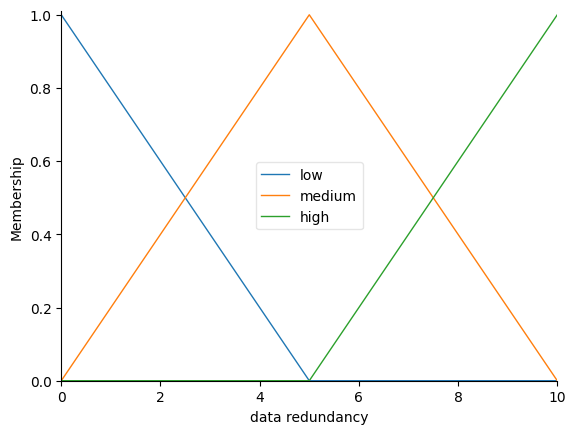

In [12]:
data_redundancy.view()

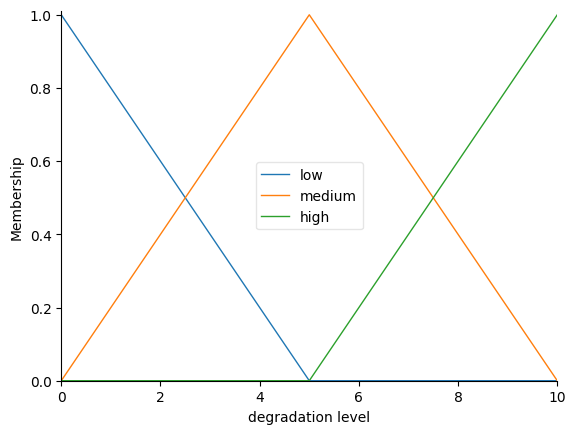

In [13]:
degradation_level.view()

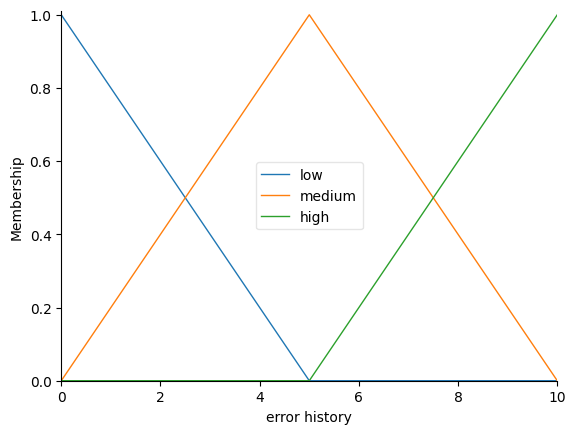

In [14]:
error_history.view()

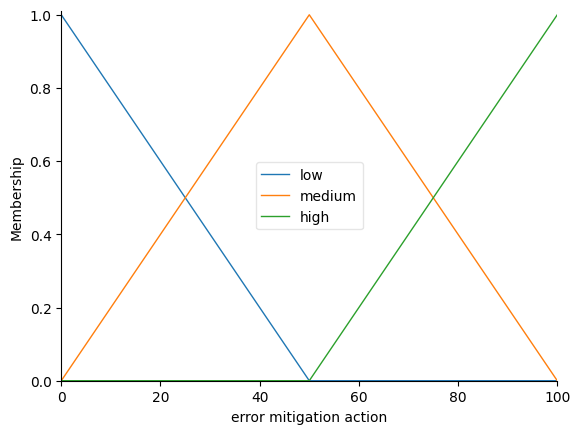

In [15]:
error_mitigation_action.view()

In [30]:
# Fuzzy Rules
# Rule base for error detection
rule1 = ctrl.Rule(data_redundancy['high'] & degradation_level['low'] & error_history['low'], error_mitigation_action['low'])
rule2 = ctrl.Rule(data_redundancy['medium'] & degradation_level['medium'] & error_history['medium'], error_mitigation_action['medium'])
rule3 = ctrl.Rule(data_redundancy['low'] & degradation_level['high'] & error_history['high'], error_mitigation_action['high'])

# Defuzzification
error_system_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
error_system = ctrl.ControlSystemSimulation(error_system_ctrl)


Error Detection and Correction
Enter Data Redundancy (between 1 and 9): 3
Enter Degradation Level (between 1 and 9): 8
Enter Error History (between 1 and 9): 7
Error Mitigation Action Value: 54.8148148148149


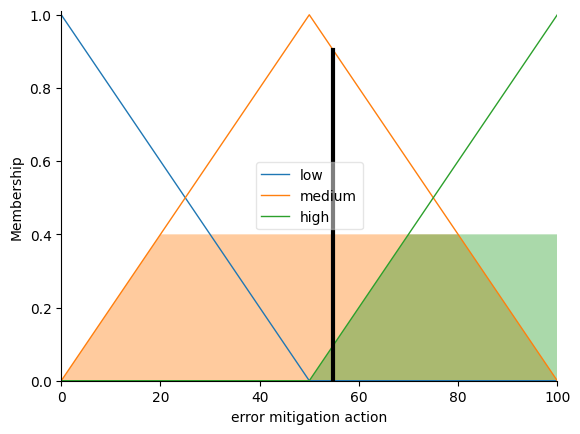

In [37]:
#User Interface
print("Error Detection and Correction")

data_redundancy_input = float(input("Enter Data Redundancy (between 1 and 9): "))
if data_redundancy_input > 9 or data_redundancy_input <= 0:
    print("Invalid value")
else:
    degradation_level_input = float(input("Enter Degradation Level (between 1 and 9): "))
    if degradation_level_input > 9 or degradation_level_input <= 0:
        print("Invalid value")
    else:
        error_history_input = float(input("Enter Error History (between 1 and 9): "))
        if error_history_input > 9 or error_history_input <= 0:
            print("Invalid value")
        else:
            error_system.input['data redundancy'] = data_redundancy_input
            error_system.input['degradation level'] = degradation_level_input
            error_system.input['error history'] = error_history_input

            error_system.compute()
            mitigation_action_value = error_system.output['error mitigation action']
            print("Error Mitigation Action Value:", mitigation_action_value)
            error_mitigation_action.view(sim=error_system)

Error Mitigation Action Value: 45.18518518518524
Error Mitigation Action Value: 51.41414141414144
Error Mitigation Action Value: 39.487179487179525
Error Mitigation Action Value: 50.00000000000004


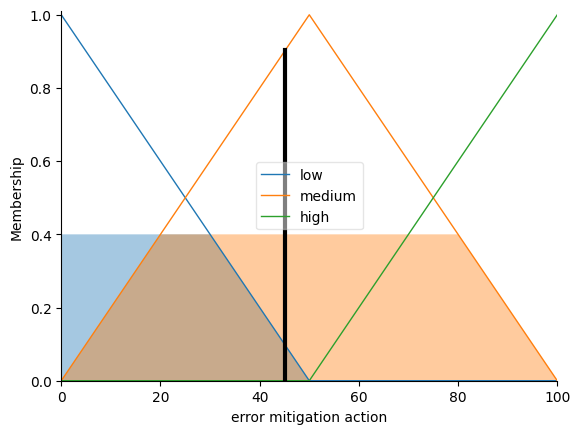

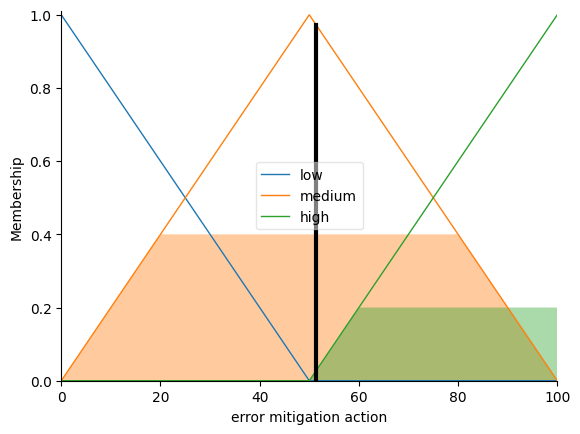

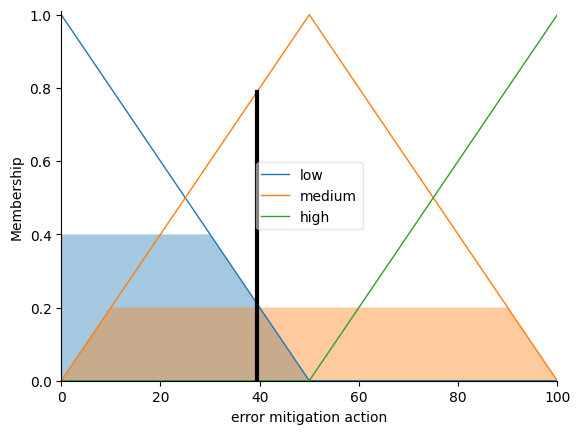

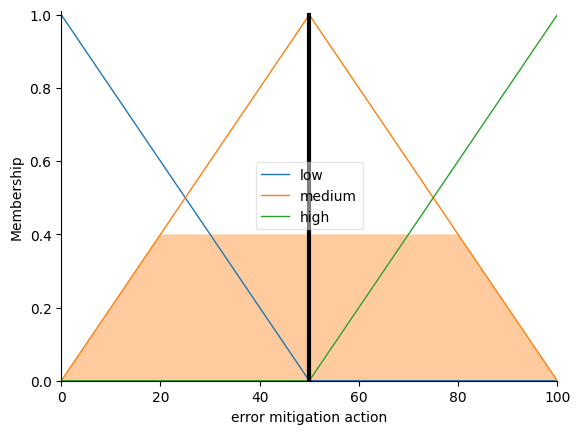

In [41]:
#Test case
sample_dataset = [
    {'data_redundancy': 7, 'degradation_level': 2, 'error_history': 3},
    {'data_redundancy': 4, 'degradation_level': 6, 'error_history': 8},
    {'data_redundancy': 9, 'degradation_level': 3, 'error_history': 1},
    {'data_redundancy': 2, 'degradation_level': 6, 'error_history': 5},
]
for test in sample_dataset:
    error_system.input['data redundancy'] = test['data_redundancy']
    error_system.input['degradation level'] = test['degradation_level']
    error_system.input['error history'] = test['error_history']
    error_system.compute()

    mitigation_action_value = error_system.output['error mitigation action']
    print("Error Mitigation Action Value:", mitigation_action_value)
    error_mitigation_action.view(sim=error_system)


